In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: No module named 'enc_dec.py'; 'enc_dec' is not a package

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
ls

__pycache__/      enc_dec.py        nmt_config.py     run_exp*
cw code.ipynb     fonts/            nmt_translate.py
data/             model/            readme.md


In [4]:
%run nmt_translate.py

/Users/jusjosgra/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
epoch=1, iter=0, loss=0.000000, mean loss=0.000000:   0%|          | 0/10000 [00:00<?, ?it/s]

Japanese English dataset configuration
vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_1-1layers_100units_q3_attn_test_SOFT_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_1-1layers_100units_q3_attn_test_SOFT_ATTN.model
--------------------------------------------------
Existing model not found!
--------------------------------------------------


epoch=1, iter=90, loss=8.062649, mean loss=9.003581:   1%|          | 90/10000 [00:12<24:24,  6.77it/s]


KeyboardInterrupt: 

In [37]:
_ = predict(s=1000,num=10)

English predictions, s=1000, num=10:


AttributeError: 'list' object has no attribute 'h'

In [74]:
_ = predict(s=0, num=10)

English predictions, s=0, num=10:
--------------------------------------------------
Src | ステーキ は 中位 で 焼 い て くださ い 。                                                       
Ref | i like my steak medium .                                                        
Hyp | please the the the the . . _EOS                                                 
--------------------------------------------------
precision | 0.1250
recall | 0.1667
--------------------------------------------------
Src | 彼女 の 美し さ に 関 し て は 、 疑 う 余地 が な い 。                                            
Ref | there is no doubt as to her beauty .                                            
Hyp | there is no to her her her . . _EOS                                             
--------------------------------------------------
precision | 0.6000
recall | 0.6667
--------------------------------------------------
Src | この 近所 の 家 は どれ も とても よく 似 て い る の で 見分け が つ か な い 。                             
Ref | all the houses in this nei

In [75]:
_ = predict(s=10000, num=10, r_filt=.5)

English predictions, s=10000, num=10:
--------------------------------------------------
Src | 彼 は ドイツ 生まれ の 人 だ 。                                                             
Ref | he is a german by origin .                                                      
Hyp | he is a of of . . _EOS                                                          
--------------------------------------------------
precision | 0.5000
recall | 0.5714
sentences matching filter = 1


In [76]:
filename_en = 'Data/text.en'
filename_jp = 'Data/text.fr'

In [77]:
def get_sentence_lengths(filename):

    lines = [line.rstrip('\n') for line in open(filename)]


    sent_len = []

    for i in range(0,len(lines)):
        x = len(lines[i].split()) - 1
        sent_len.append(x)
        
    return sent_len

In [78]:
sent_len_en = get_sentence_lengths(filename_en)
sent_len_jp = get_sentence_lengths(filename_jp)

In [79]:
dims = (10,6)

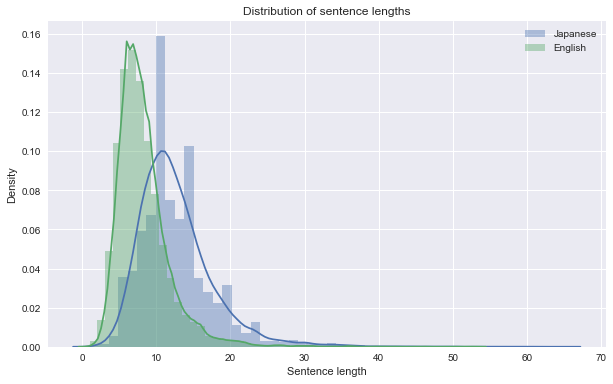

In [80]:
fig, ax = plt.subplots(figsize=dims)
sns.distplot(sent_len_jp, ax=ax, label='Japanese')
sns.distplot(sent_len_en, ax=ax, label='English')
plt.title('Distribution of sentence lengths')
ax.set(xlabel='Sentence length', ylabel='Density')
plt.legend()
plt.savefig('/Users/jusjosgra/uni/MT/plots/dist.pdf')

In [81]:
np.corrcoef(sent_len_jp,sent_len_en)

array([[1.        , 0.76626682],
       [0.76626682, 1.        ]])

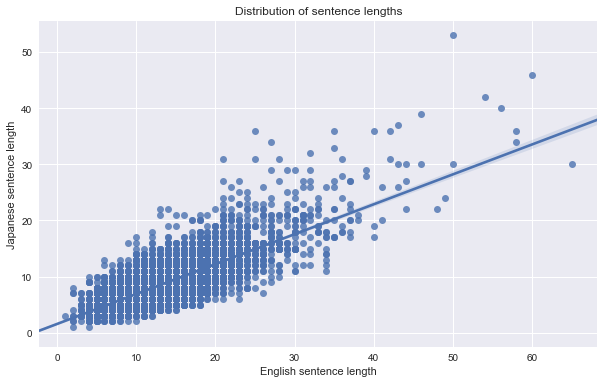

In [82]:
sns.regplot(np.array(sent_len_jp), np.array(sent_len_en))
plt.xlabel('English sentence length')
plt.ylabel('Japanese sentence length')
plt.title('Distribution of sentence lengths')
plt.savefig('/Users/jusjosgra/uni/MT/plots/corr.pdf')

In [83]:
filename = filename_en

lines = [line.rstrip('\n') for line in open(filename)]


sents = []

for i in range(0,len(lines)):
    x = lines[i].split()
    sents = sents + x

In [84]:
len(sents)

97643

In [85]:
len(np.unique(sents))

7211

In [86]:
filename = filename_jp

lines = [line.rstrip('\n') for line in open(filename)]


sents = []

for i in range(0,len(lines)):
    x = lines[i].split()
    sents = sents + x

In [87]:
len(sents)

143580

In [88]:
len(np.unique(sents))

8251

In [89]:
unique_elements, counts_elements = np.unique(sents, return_counts=True)

In [90]:
len(counts_elements[counts_elements == 1])

4171

## Training models

In [ ]:
# train model
!./run_exp

Running mt experiment
/Users/jusjosgra/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Japanese English dataset configuration
vocab size, en=3713, fr=3949
--------------------------------------------------
Training progress will be logged in:
	model/train_10000sen_1-1layers_100units_q3_attn_test2_SOFT_ATTN.log
--------------------------------------------------
Trained model will be saved as:
	model/seq2seq_10000sen_1-1layers_100units_q3_attn_test2_SOFT_ATTN.model
--------------------------------------------------
Existing model not found!
--------------------------------------------------
epoch=1, iter=10000, loss=6.510277, mean loss=6.074275: 100%|█| 10000/10000 [30:58<00:00,  5.28it/s]
-------------------------------------------------

In [6]:
compute_dev_bleu()

100%|██████████| 500/500 [00:11<00:00, 42.27it/s]


BLEU: 0.000


0

English predictions, s=10000, num=1:
--------------------------------------------------
Src | この 路地 は 通り抜け でき ま せ ん 。                                                         
Ref | this is a dead @-@ end alley .                                                  
Hyp | . . _EOS                                                                        
--------------------------------------------------
precision | 0.3333
recall | 0.1250
sentences matching filter = 1


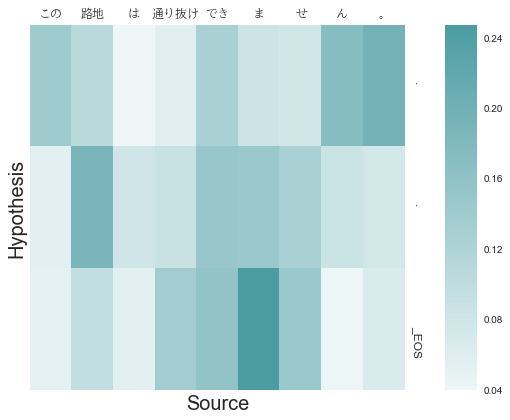

In [29]:
_ = predict(s=10000, num=1, plot=True)

In [30]:
compute_dev_bleu()

100%|██████████| 500/500 [00:15<00:00, 32.11it/s]


BLEU: 0.000


0

In [7]:
model

In [8]:
a, arr = decoder_predict()

NameError: name 'decoder_predict' is not defined

In [34]:
alpha_arr

NameError: name 'alpha_arr' is not defined

In [39]:
model.attn

1